In [1]:
import tensorflow as tf
import os
import time
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.cm as cm
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras.datasets import fashion_mnist
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense,Dropout,Activation,Flatten
from tensorflow.keras import layers,activations
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from PIL import Image,ImageFilter,ImageStat
import random
random.seed(42)
import PIL
import itertools
import glob
from mpl_toolkits.axes_grid1 import AxesGrid

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_dir=r"C:\Users\bedir\OneDrive\Masaüstü\f11_data\f1_classification"
train_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.1)
test_datagen= ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)
test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


(2, 500, 500, 3)
[0. 1. 0. 0.]


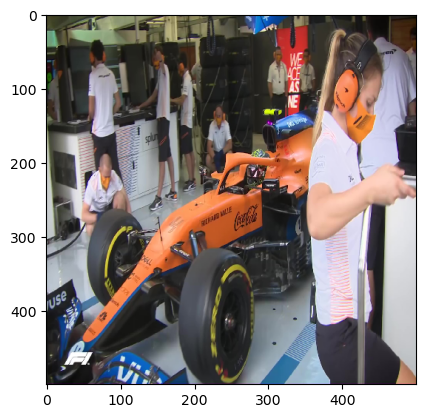

(2, 500, 500, 3)
[1. 0. 0. 0.]


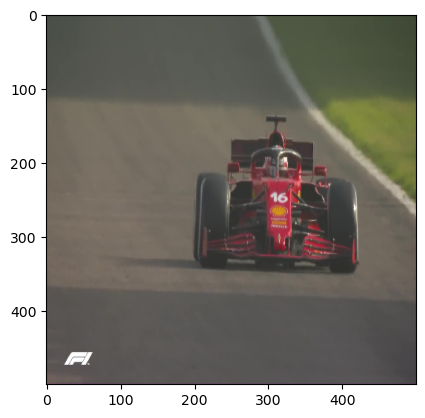

(2, 500, 500, 3)
[0. 0. 0. 1.]


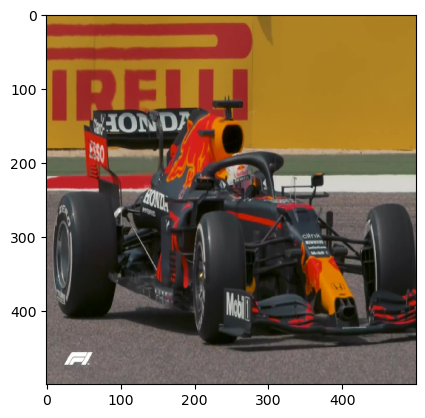

(2, 500, 500, 3)
[0. 1. 0. 0.]


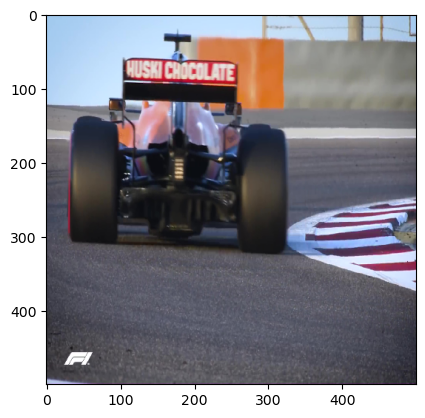

(2, 500, 500, 3)
[0. 0. 1. 0.]


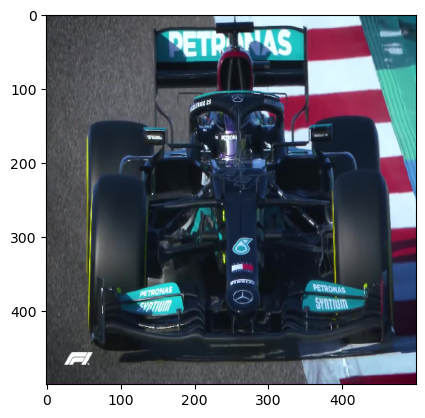

In [3]:
for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

In [4]:
model=Sequential()
model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=8, activation='elu', kernel_size=(3, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))
          
model.add(layers.Flatten())
          
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)       0

In [6]:
import wandb
from wandb.keras import  WandbCallback

wandb.login()
wandb.init(project="video")


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\bedir/.netrc
wandb: Currently logged in as: bedirhancelik4343. Use `wandb login --relogin` to force relogin


In [7]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [8]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [12]:
result = model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen,callbacks=[WandbCallback(data_type="image",
                                                                                                         validation_data=test_datagen)])

Epoch 1/5
1/1 [==============================] - 0s 280ms/step loss: 0.0653 - mse: 0.0079 - accuracy: 0.98


INFO:tensorflow:Assets written to: C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best)... Done. 0.3s


126/126 [==============================] - 52s 414ms/step - loss: 0.0653 - mse: 0.0079 - accuracy: 0.9802 - val_loss: 2.0267 - val_mse: 0.2057 - val_accuracy: 0.5000
Epoch 2/5
126/126 [==============================] - 31s 249ms/step - loss: 0.1374 - mse: 0.0126 - accuracy: 0.9722 - val_loss: 2.5002 - val_mse: 0.2381 - val_accuracy: 0.4643
Epoch 3/5
1/1 [==============================] - 0s 62ms/step- loss: 0.1059 - mse: 0.0105 - accuracy: 0.97


INFO:tensorflow:Assets written to: C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\bedir\wandb\run-20230328_042721-kkzf2juu\files\model-best)... Done. 0.3s


126/126 [==============================] - 39s 307ms/step - loss: 0.1059 - mse: 0.0105 - accuracy: 0.9722 - val_loss: 1.8870 - val_mse: 0.1878 - val_accuracy: 0.5357
Epoch 4/5
126/126 [==============================] - 32s 254ms/step - loss: 0.1126 - mse: 0.0133 - accuracy: 0.9683 - val_loss: 2.7595 - val_mse: 0.2587 - val_accuracy: 0.4286
Epoch 5/5
126/126 [==============================] - 32s 256ms/step - loss: 0.0029 - mse: 7.2712e-05 - accuracy: 1.0000 - val_loss: 2.9736 - val_mse: 0.2604 - val_accuracy: 0.4286


In [14]:
result.history

{'loss': [0.06533854454755783,
  0.13744939863681793,
  0.10587350279092789,
  0.11258538067340851,
  0.0029473272152245045],
 'mse': [0.007893704809248447,
  0.012613847851753235,
  0.010542641393840313,
  0.013334594666957855,
  7.271175127243623e-05],
 'accuracy': [0.9801587462425232,
  0.9722222089767456,
  0.9722222089767456,
  0.9682539701461792,
  1.0],
 'val_loss': [2.0266549587249756,
  2.500195264816284,
  1.8870248794555664,
  2.7595341205596924,
  2.9736311435699463],
 'val_mse': [0.20571401715278625,
  0.23805558681488037,
  0.18775184452533722,
  0.25867047905921936,
  0.2603953182697296],
 'val_accuracy': [0.5,
  0.4642857015132904,
  0.5357142686843872,
  0.4285714328289032,
  0.4285714328289032]}